In [37]:
import numpy as np

def onedim_8sites_IsingModel_OBC(qc,n_qubits,dt):
    
    odd=[0,2,4,6]
    even=[1,3,5]
    for i in range(n_qubits):
        qc.rz(-2*ht*dt,i) #qc.rz(-2 * theta, i)  # Implements e^{i θ Z} to the qubit i
    qc.barrier()
    for i in odd:
        qc.cx(i,i+1)
    for i in odd:
        qc.rx(-2*J*dt,i)
    for i in odd:
        qc.cx(i,i+1)
    qc.barrier()
    for i in even:
        qc.cx(i,i+1)
    for i in even:
        qc.rx(-2*J*dt,i)
    for i in even:
        qc.cx(i,i+1)
    qc.barrier()      

def onedim_8sites_IsingModel_PBC(qc,n_qubits,dt):
    
    odd=[0,2,4,6]
    even=[1,3,5]
    for i in range(n_qubits):
        qc.rz(-2*ht*dt,i) #qc.rz(-2 * theta, i)  # Implements e^{i θ Z} to the qubit i
    qc.barrier()
    for i in odd:
        qc.cx(i,i+1)
    for i in odd:
        qc.rx(-2*J*dt,i)
    for i in odd:
        qc.cx(i,i+1)
    qc.barrier()
    for i in even:
        qc.cx(i,i+1)
    for i in even:
        qc.rx(-2*J*dt,i)
    for i in even:
        qc.cx(i,i+1)
    qc.barrier()      
    qc.cx(0,n_qubits-1)
    qc.rx(-2*J*dt,0)
    qc.cx(0,n_qubits-1)
    qc.barrier()      


In [ ]:
#check which virtual environment using
import sys
print("Python en uso:", sys.executable)


Python en uso: c:\Users\pablo\OneDrive\Escritorio\Universidad\TFG\Qiskit\Scripts\python.exe


In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister


# ===============================
# Create an arbitrary circuit
# ===============================
J=0.02
ht=1
dt=10
time_steps=48
n_qubits=8
qr=QuantumRegister(n_qubits)
qc=QuantumCircuit(qr)

qc.draw() #check that we are not "rewritting" on an used circuit


q3_0: 
      
q3_1: 
      
q3_2: 
      
q3_3: 
      
q3_4: 
      
q3_5: 
      
q3_6: 
      
q3_7:

In [40]:
#Initialize the state vector
qc.x(0)

for t in range(time_steps):
    onedim_8sites_IsingModel_OBC(qc,n_qubits,dt)

qc.measure_all()

In [ ]:
# ===================================
# Run on a real quantum computer (here I store my account data locally)
# ===================================
from qiskit_ibm_runtime import QiskitRuntimeService

# Save your data locally so you don't have to re-enter it every time.
QiskitRuntimeService.save_account(
    channel="ibm_cloud",
    token="------------------------",
    instance="---------------------",
    overwrite=True
)

service = QiskitRuntimeService()

In [ ]:
# See which devices (simulators/QPUs) you have access to
backends = service.backends()
print(backends)

[<IBMBackend('ibm_torino')>, <IBMBackend('ibm_brisbane')>]


In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit import transpile
# Get a real backend
backend_real = service.backend("ibm_torino")  
qc_transpiled = transpile(qc, backend=backend_real)

sampler_real = Sampler(backend_real)
job_real = sampler_real.run([qc_transpiled], shots=10000)
counts_real = job_real.result()[0].data.meas.get_counts()


In [45]:
# Inspect result of SamplerV2 primitive performed on real IBM quantum hardware
print("\nResult for the ibm_torino hardware:")
print(counts_real)

result_real = job_real.result()
spans = result_real.metadata["execution"]["execution_spans"]
shots = spans[0].size
print("Total shots executed:", shots)


Result for the ibm_torino hardware:
{'10100100': 25, '00000001': 1251, '10101000': 25, '01001101': 16, '01101010': 16, '00110110': 23, '00110011': 19, '10000001': 135, '00001000': 197, '01000001': 164, '00000000': 894, '10000000': 200, '00010000': 346, '01100000': 91, '10000100': 66, '00000011': 174, '01011101': 12, '00001010': 83, '10001001': 28, '00111010': 14, '00000101': 156, '10110000': 19, '00100110': 31, '00100100': 75, '00000010': 298, '10000011': 38, '01001011': 13, '00011000': 65, '11011010': 8, '00100010': 84, '01010000': 55, '01000000': 225, '01000110': 28, '10000101': 28, '11010000': 33, '00100001': 131, '01101110': 11, '00000100': 432, '00101100': 30, '11000111': 7, '00100000': 269, '11000001': 35, '01101000': 22, '00010001': 130, '01101001': 16, '11000011': 20, '01100111': 12, '01011011': 8, '11101001': 10, '01111010': 6, '10001010': 20, '00001110': 37, '01010101': 12, '01111001': 9, '11000000': 68, '00001011': 42, '00110000': 72, '00010010': 66, '01011010': 9, '0010100

In [ ]:
# ===================================
#  Calculate the probability that each qubit is in state |1>.
# ===================================
total_shots = sum(counts_real.values())
prob_qubits = [0] * n_qubits

for bitstring, freq in counts_real.items():
    # bitstring is in little-endian order (q2 q1 q0)
    for i, bit in enumerate(reversed(bitstring)):
        if bit == "1":
            prob_qubits[i] += freq

# Normalize
prob_qubits = [p / total_shots for p in prob_qubits]

print("\nProbability of each qubit being in |1>:")
for i, p in enumerate(prob_qubits):
    print(f"Qubit {i}: {p:.4f}")



Probabilidad de cada qubit de estar en |1>:
Qubit 0: 0.4027
Qubit 1: 0.2498
Qubit 2: 0.2697
Qubit 3: 0.2276
Qubit 4: 0.2456
Qubit 5: 0.2312
Qubit 6: 0.2352
Qubit 7: 0.2130


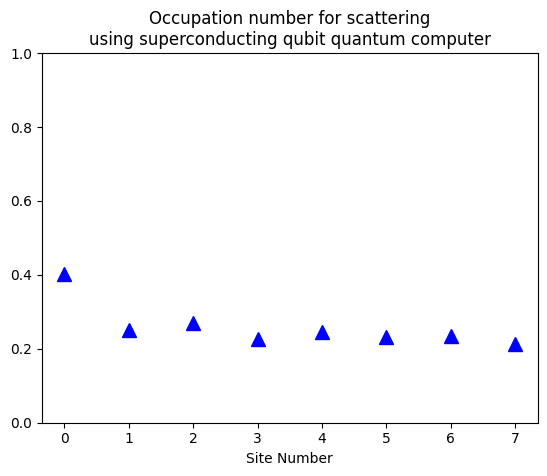

In [ ]:
# ===================================
# Optional display
# ===================================
import matplotlib.pyplot as plt
#plt.bar(range(n_qubits), probs) this is for plotting bars (in the paper are used for representing the exact diagonalization case)

plt.plot(range(len(prob_qubits)), prob_qubits,
         '^',          
         color='blue', 
         markersize=10 
)
plt.ylim(0, 1)
plt.xlabel("Site Number")
plt.title("Occupation number for scattering\nusing superconducting qubit quantum computer", fontsize=12)

plt.show()

Resultados guardados en Fig9a)_(G1)_ibm_torino.json


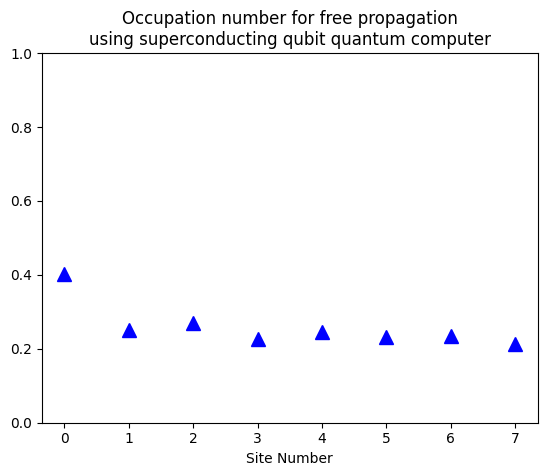

Histograma guardado en Fig9a)_(G1)_ibm_torino.png


In [ ]:
# ==============================
# Save results in JSON
# ==============================

import os
import json

save_path = r"C:\Users\pablo\OneDrive\Escritorio\Universidad\TFG\Fig9_ibm_torino\Fig9a)_ibm_torino"
os.makedirs(save_path, exist_ok=True)

results_dict = {
    "counts": counts_real,
    "shots": shots,
    "prob_qubits": prob_qubits
}

label = "G1"
filename_json = f"Fig9a)_({label})_ibm_torino.json"
filename_png  = f"Fig9a)_({label})_ibm_torino.png"

with open(os.path.join(save_path, filename_json), "w") as f:
    json.dump(results_dict, f, indent=4)

print(f"Results saved in {filename_json}")

# ==============================
# 6. Guardar el histograma
# ==============================
plt.plot(range(len(prob_qubits)), prob_qubits,
         '^', color='blue', markersize=10)
plt.ylim(0, 1)
plt.xlabel("Site Number")
plt.title("Occupation number for free propagation\nusing superconducting qubit quantum computer", fontsize=12)


plt.savefig(os.path.join(save_path, filename_png), dpi=300)
plt.show()

print(f"Histogram saved in {filename_png}")